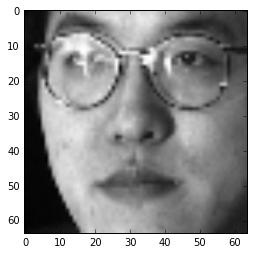

In [1]:
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt
import random
%matplotlib inline

data = []
n_train = []

data.append(sio.loadmat('./PIEdataset/Pose05_64x64.mat'))
data.append(sio.loadmat('./PIEdataset/Pose07_64x64.mat'))
data.append(sio.loadmat('./PIEdataset/Pose09_64x64.mat'))
data.append(sio.loadmat('./PIEdataset/Pose27_64x64.mat'))
data.append(sio.loadmat('./PIEdataset/Pose29_64x64.mat'))

n_train.append(data[0]['fea'].shape[0])
index = random.randint(0, n_train[0])
imgtest=data[0]['fea'][index].reshape(64,64)
plt.imshow(imgtest,'gray')

n_train.append(data[1]['fea'].shape[0])
n_train.append(data[2]['fea'].shape[0])
n_train.append(data[3]['fea'].shape[0])
n_train.append(data[4]['fea'].shape[0])

In [2]:
print(data[0]['isTest'][3329][0])

1.0


/usr/local/lib/python3.5/dist-packages/skimage/feature/_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


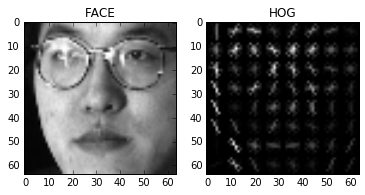

In [3]:
from skimage.feature import hog

# Define HOG parameters
orient = 9
pix_per_cell = 8
cell_per_block = 2

# Define a function to return HOG features and visualization
def get_hog_features(img, orient, pix_per_cell, cell_per_block, vis=False, feature_vec=True):
    if vis == True:
        features, hog_image = hog(img, orientations=orient, pixels_per_cell=(pix_per_cell, pix_per_cell),
                                  cells_per_block=(cell_per_block, cell_per_block), transform_sqrt=False, 
                                  visualise=True, feature_vector=False)
        return features, hog_image
    else:      
        features = hog(img, orientations=orient, pixels_per_cell=(pix_per_cell, pix_per_cell),
                       cells_per_block=(cell_per_block, cell_per_block), transform_sqrt=False, 
                       visualise=False, feature_vector=feature_vec)
        return features
    
features, hog_image = get_hog_features(imgtest, orient, 
                        pix_per_cell, cell_per_block, 
                        vis=True, feature_vec=False)

# Plot the examples
fig = plt.figure()
plt.subplot(121)
plt.imshow(imgtest, 'gray')
plt.title('FACE')
plt.subplot(122)
plt.imshow(hog_image, 'gray')
plt.title('HOG')

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC

x_train = []
y_train = []
x_valid = []
y_valid = []
x_test = []
y_test = []

features = []

for dat in range(5):
    for img in range(n_train[dat]):
        if data[dat]['isTest'][img][0] < 1.0:
            x_train.append(get_hog_features(data[dat]['fea'][img].reshape(64,64),orient, pix_per_cell, cell_per_block, feature_vec=False))
            y_train.append(int(data[dat]['gnd'][img]))
        else:
            x_test.append(get_hog_features(data[dat]['fea'][img].reshape(64,64),orient, pix_per_cell, cell_per_block, feature_vec=False))
            y_test.append(int(data[dat]['gnd'][img]))


            
x_train = np.array(x_train)
x_train = x_train.reshape(10262,1764)
y_train = np.array(y_train)
y_train = y_train.reshape(10262,1)
x_test = np.array(x_test)
x_test = x_test.reshape(1292,1764)
y_test = np.array(y_test)
y_test = y_test.reshape(1292,1)

/usr/local/lib/python3.5/dist-packages/skimage/feature/_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


In [5]:
x_train.shape

(10262, 1764)

In [6]:
from sklearn.preprocessing import StandardScaler
import sklearn
import time
sklearn.utils.shuffle(x_train, y_train)


# Use a linear SVC 
svc = LinearSVC()
# Check the training time for the SVC
t=time.time()
svc.fit(x_train, y_train)
t2 = time.time()
print(round(t2-t, 2), 'Seconds to train SVC...')
# Check the score of the SVC
print('Test Accuracy of SVC = ', round(svc.score(x_test, y_test), 4))
# Check the prediction time for a single sample
t=time.time()
n_predict = 10
print('My SVC predicts: ', svc.predict(x_test[0:n_predict]))
print('For these',n_predict, 'labels: ', y_test[0:n_predict])
t2 = time.time()
print(round(t2-t, 5), 'Seconds to predict', n_predict,'labels with SVC')

/usr/local/lib/python3.5/dist-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


20.13 Seconds to train SVC...
Test Accuracy of SVC =  0.9923
My SVC predicts:  [1 1 1 1 1 2 2 2 2 2]
For these 10 labels:  [[1]
 [1]
 [1]
 [1]
 [1]
 [2]
 [2]
 [2]
 [2]
 [2]]
0.00133 Seconds to predict 10 labels with SVC


In [42]:
from keras.models import load_model
import time
model = load_model('model.h5')

y_test = np_utils.to_categorical(y_test)

t=time.time()
loss_and_metrics = model.evaluate(x_test, y_test, batch_size=128)

10112/10240 [============================>.] - ETA: 0s 

In [29]:
print(1-loss_and_metrics)

0.994529466162


array([[  1.54419863e-22,   8.88066888e-01,  -2.59724483e-02, ...,
         -9.17631108e-03,  -9.73397307e-03,  -9.71097685e-03],
       [  1.16565319e-22,   8.09682369e-01,  -3.71393561e-02, ...,
         -2.92580482e-03,  -3.39010451e-03,  -2.71996390e-03],
       [  1.25210855e-22,   8.73781145e-01,  -4.40411791e-02, ...,
         -9.21837892e-03,  -9.35570337e-03,  -1.01373009e-02],
       ..., 
       [  9.03705169e-23,   2.62607671e-02,   1.37205394e-02, ...,
          3.99843901e-02,   3.76201943e-02,   3.90570909e-02],
       [  8.33571648e-24,  -1.71444528e-02,  -2.28718109e-03, ...,
          2.34060027e-02,   2.10159533e-02,   2.16024313e-02],
       [  8.46224914e-23,   7.40210265e-02,   1.51654910e-02, ...,
          3.84875201e-02,   3.62065099e-02,   3.75808179e-02]], dtype=float32)